
# Importing All Necessary Python Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Reading Different Data Sets

In [ ]:
train_data=pd.read_csv("/content/train.csv")

# Descriptive  Data Analysis

In [ ]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
train_data.shape

(2000, 21)

In [ ]:
#missing values
train_data.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

#Exploratory Data Anylysis

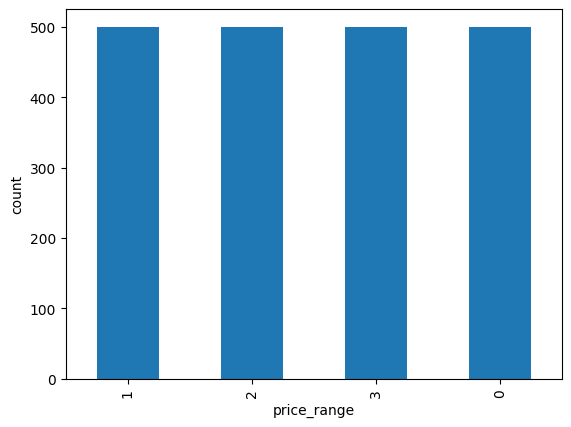

In [ ]:
price_plot=train_data['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('count')
plt.show()

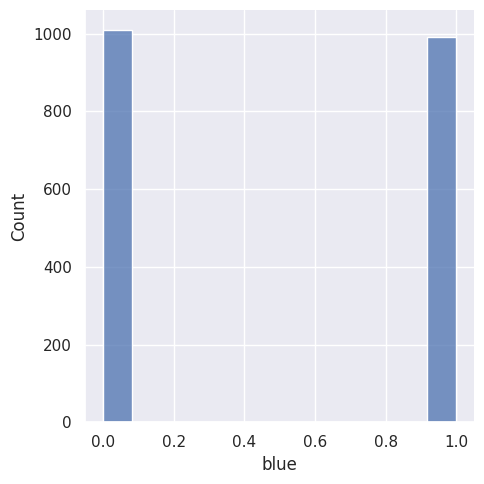

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data["blue"])
plt.show()

<Axes: xlabel='price_range', ylabel='talk_time'>

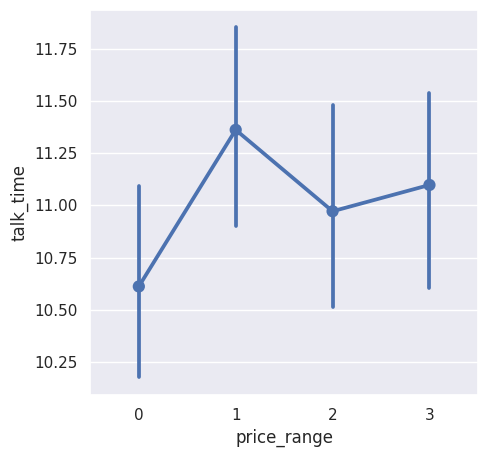

In [ ]:
sns.pointplot(y="talk_time", x="price_range", data=train_data)

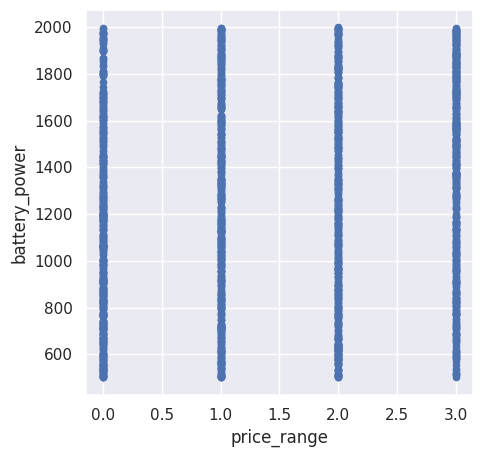

In [ ]:
train_data.plot(x='price_range',y='battery_power',kind='scatter')
plt.show()

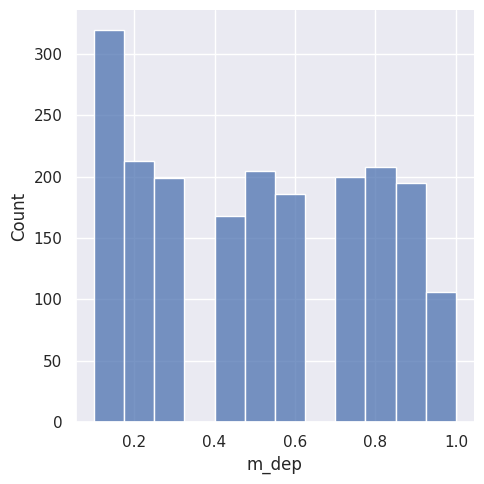

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data["m_dep"])
plt.show()

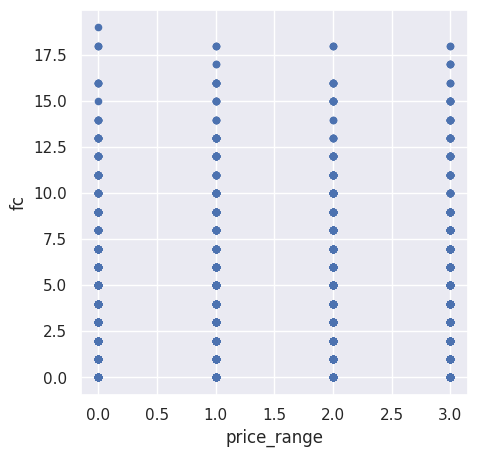

In [ ]:
train_data.plot(x='price_range',y='fc',kind='scatter')
plt.show()

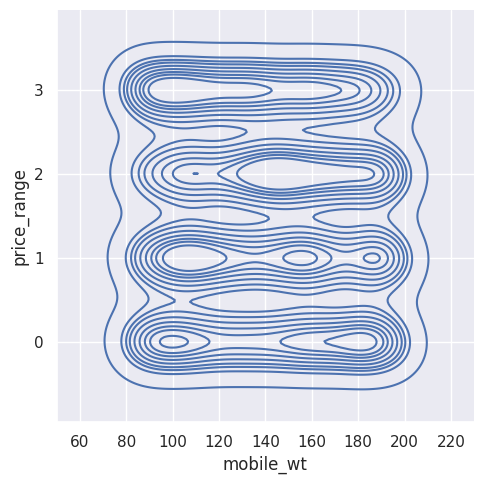

In [ ]:
sns.displot(train_data, x='mobile_wt',y='price_range',kind='kde');

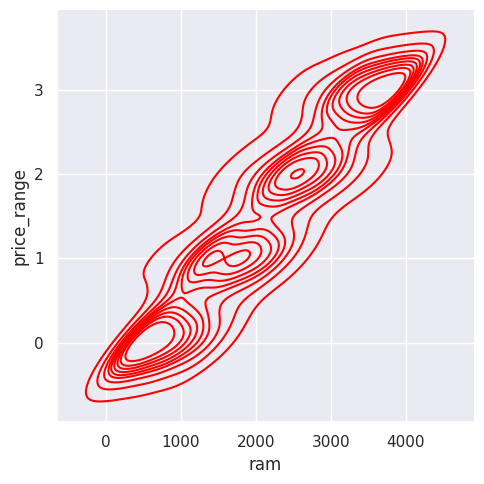

In [ ]:
sns.displot(train_data, x='ram',y='price_range', color='red',kind='kde');

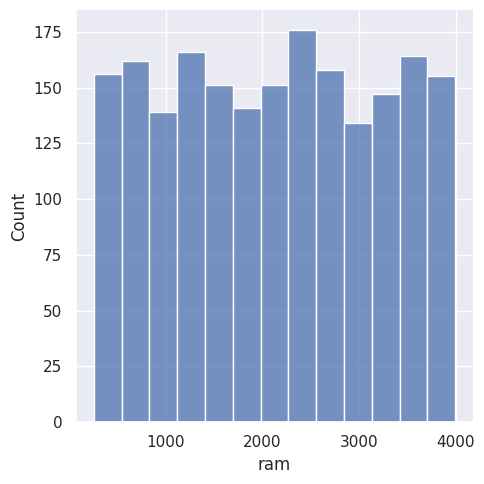

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data["ram"])

plt.show()

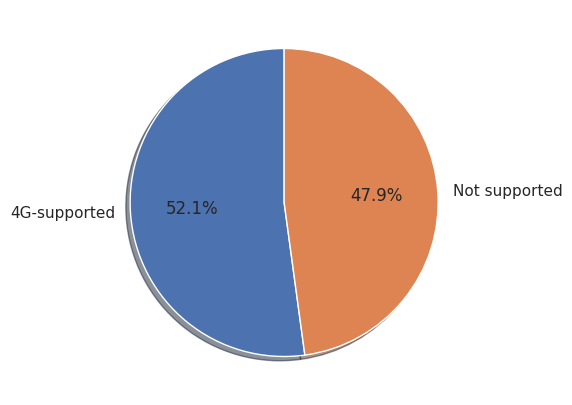

In [ ]:
labels4g = ["4G-supported",'Not supported']
values4g = train_data['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

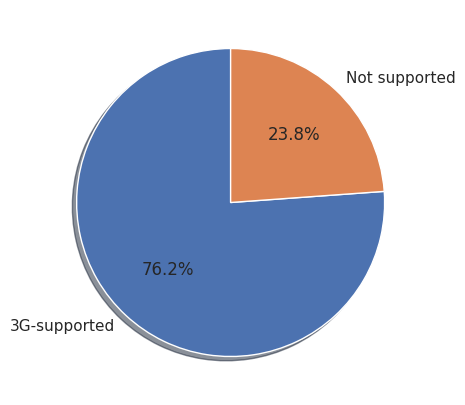

In [ ]:
labels = ["3G-supported",'Not supported']
values=train_data['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

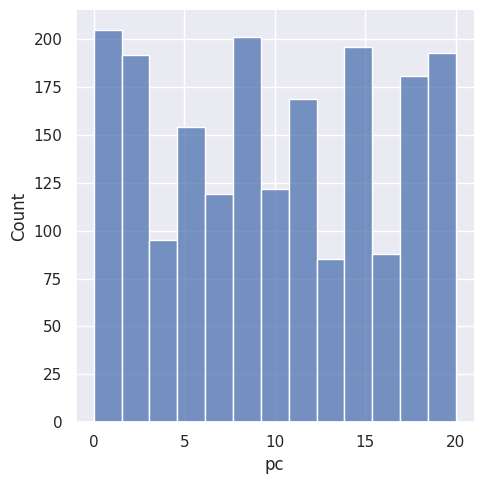

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data["pc"])

plt.show()

#Dropping Class Labels

In [ ]:
X_train = train_data.drop('price_range',axis=1)
y_train = train_data['price_range']


#Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_train, y_train, test_size=0.2, random_state=7)

In [ ]:
# Preprocessing the data
from sklearn.preprocessing import MinMaxScaler

# Scaling the Data
scaler = MinMaxScaler(feature_range=(0, 1), copy=True, clip=False)
train_data = scaler.fit_transform(X_train)

In [ ]:
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

#Correlation Matrix

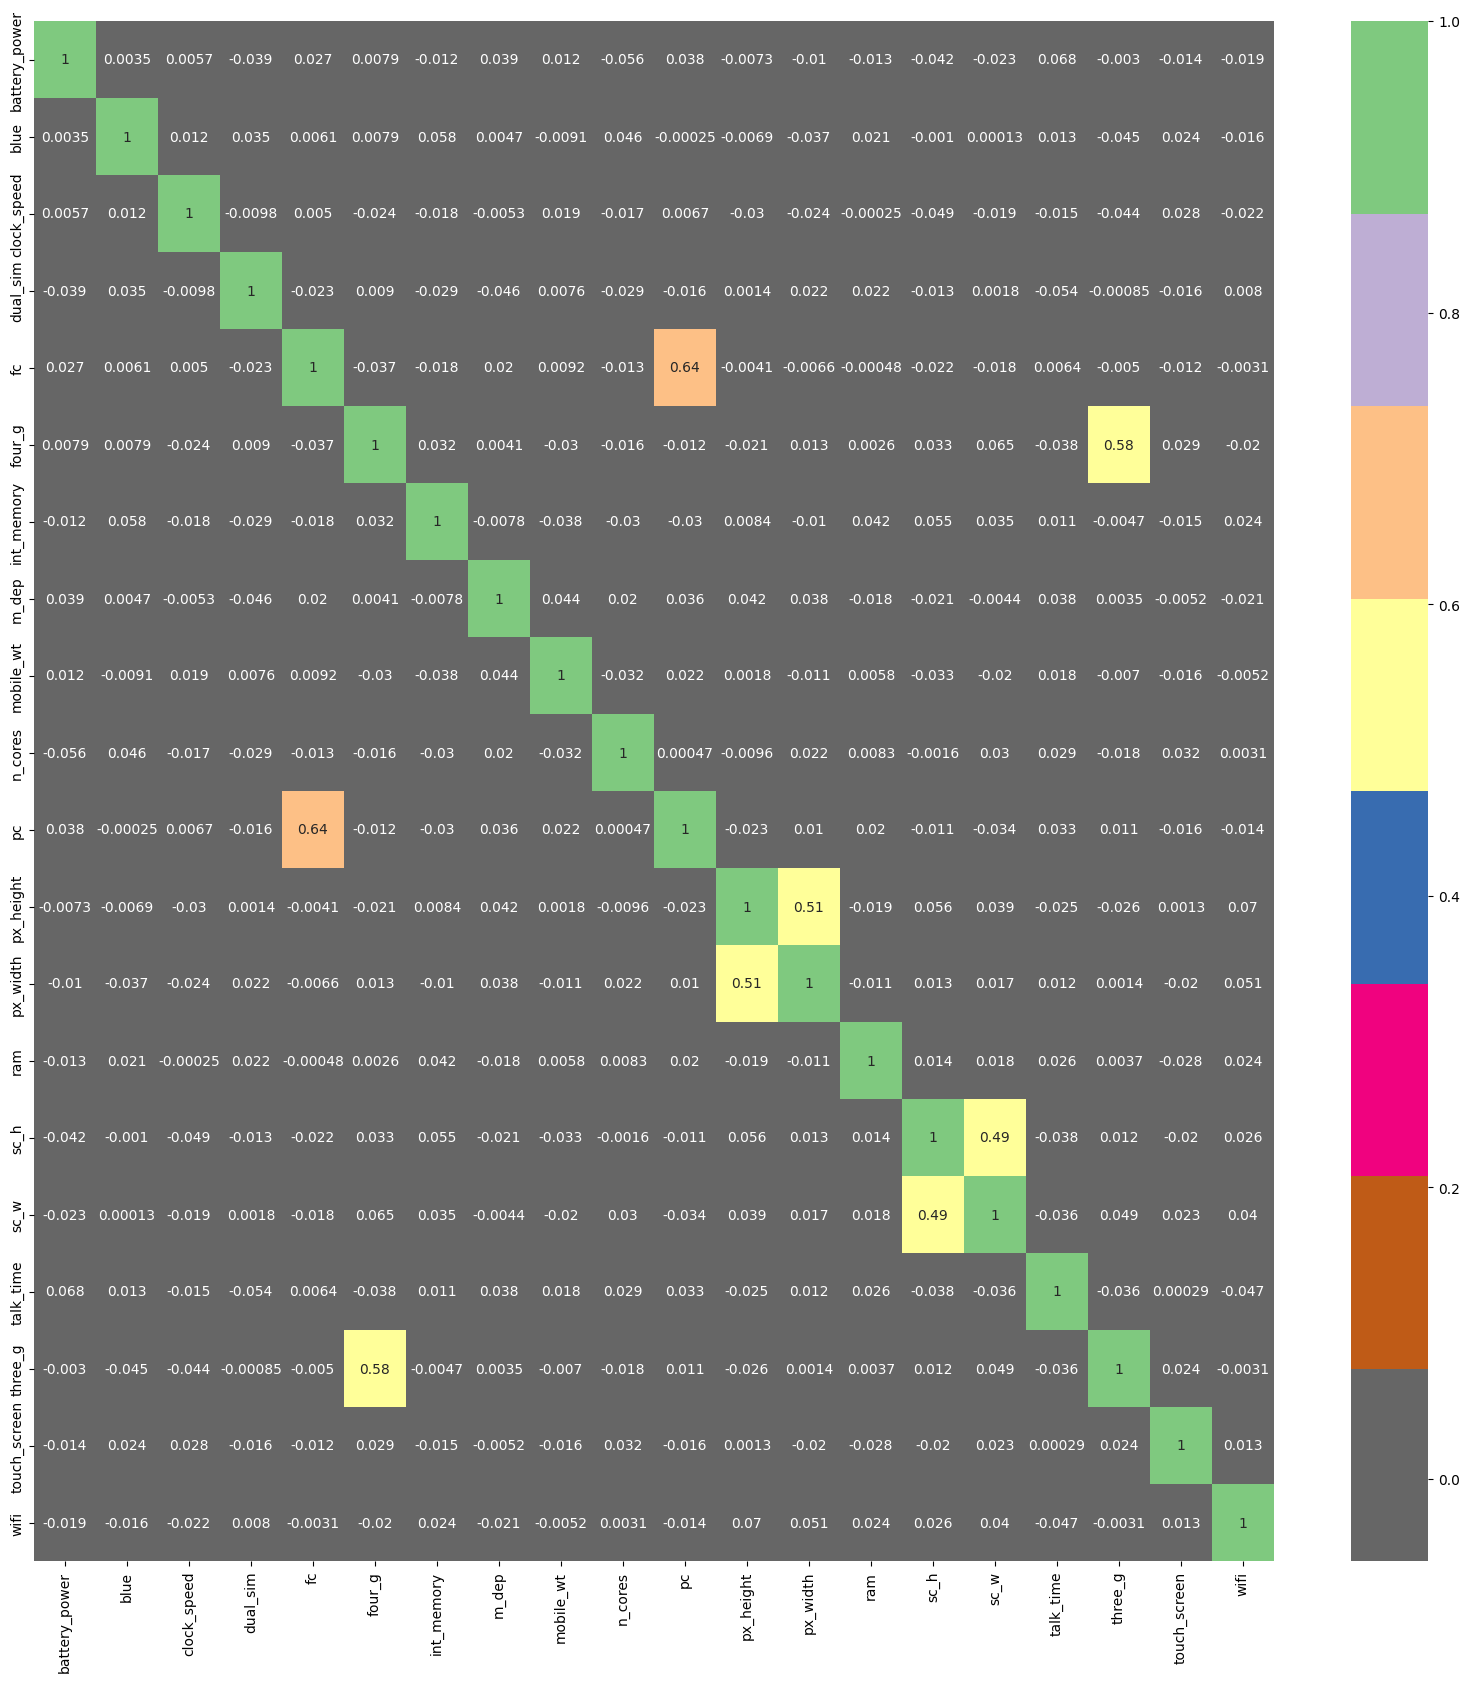

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(),annot=True,cmap=plt.cm.Accent_r)
corr_matrix = X_train.corr()
plt.show()

#Building Models

## Random Forest Classification (without hyperparameter tuning)


Random Forest Classifier Accuracy Score:  0.875
f1 Score: 0.8756426926002817
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       109
           1       0.77      0.89      0.82        89
           2       0.83      0.76      0.79       106
           3       0.93      0.91      0.92        96

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.87       400
weighted avg       0.88      0.88      0.88       400



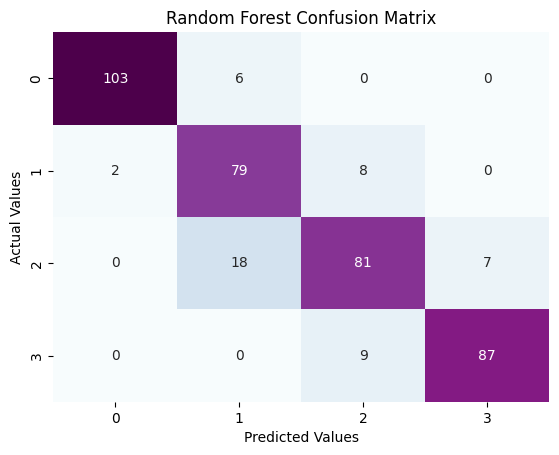

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
  
# predict the model
y_pred = model.predict(X_test)
  
# performance evaluation metrics
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_test,y_pred))
print('f1 Score:', f1_score(y_test, y_pred, average='weighted'))
cm_rfc=my_confusion_matrix(y_test, y_pred, 'Random Forest Confusion Matrix')

## Random Forest Classification (with hyperparameter tuning)


In [ ]:
param_grid = {
     'n_estimators': [100, 150, 200],
     'max_depth': [5,6,7,8,9,10,11,12],
     'min_samples_leaf': [2, 3, 4],
     'min_samples_split': [6, 8, 10],
     'max_features' : [5,6,7,8,9,10,11,12],
     'criterion' : ['gini', 'entropy', 'log_loss' ]}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(),param_grid=param_grid, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

In [ ]:
rfc=RandomForestClassifier(bootstrap= True,
                          criterion='log_loss',
                          max_depth= 9,
                          max_features= 12,
                          min_samples_leaf= 2,
                          min_samples_split= 6,
                          n_estimators= 150,
                          random_state=7)

In [ ]:
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_test)

Random Forest Classifier Accuracy Score:  0.92
f1 Score: 0.9200259629567219
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       109
           1       0.88      0.97      0.92        89
           2       0.89      0.86      0.88       106
           3       0.92      0.91      0.91        96

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



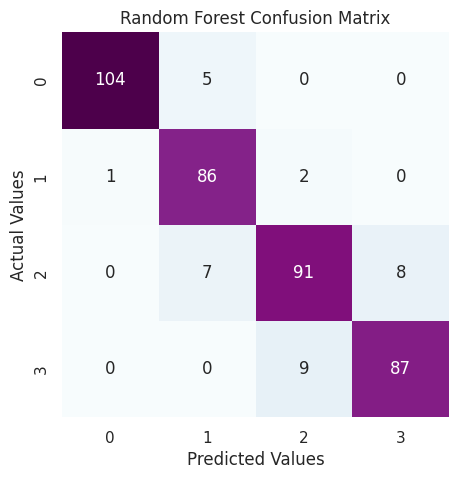

In [ ]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_rfc)) #accuracy and confusion matrix of random forest classifier
print('f1 Score:', f1_score(y_test, y_pred_rfc, average='weighted'))
cm_rfc=my_confusion_matrix(y_test, y_pred_rfc, 'Random Forest Confusion Matrix')

Points to be noted:

hyperparameter tuning process for a Random Forest Classifier model using GridSearchCV.
GridSearchCV is a function that performs an exhaustive search over a specified hyperparameter grid.
Reason for long time execution:

The Random Forest Classifier is a relatively complex model that requires training multiple decision trees and combining their outputs.
parameter grid contains many hyperparameters and possible values, then the grid search process can take a long time

## Gaussian Naive Bayes (without hyperparameter tuning)


Accuracy Score: 0.8
f1 Score: 0.803568475145296
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       109
           1       0.65      0.76      0.70        89
           2       0.70      0.69      0.70       106
           3       0.91      0.85      0.88        96

    accuracy                           0.80       400
   macro avg       0.81      0.80      0.80       400
weighted avg       0.81      0.80      0.80       400



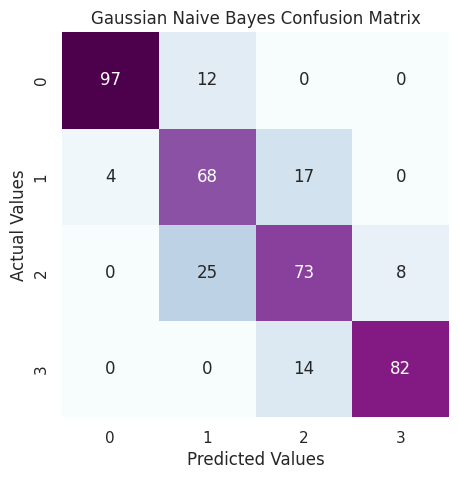

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred_wo_tune = nb.predict(X_test)
print('\nAccuracy Score:', accuracy_score(y_test, nb_pred_wo_tune))
print('f1 Score:', f1_score(y_test, nb_pred_wo_tune, average='weighted'))
cm_nb=my_confusion_matrix(y_test, nb_pred_wo_tune, 'Gaussian Naive Bayes Confusion Matrix')

## Gaussian Naive Bayes (with hyperparameter tuning)

In [ ]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(GaussianNB(), param_grid=params_NB, verbose=1, cv=5, scoring='f1_macro') 
gs_NB.fit(X_train, y_train)
gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 2.848035868435799e-07}

Accuracy Score: 0.805
f1 Score: 0.8092761260866478
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       109
           1       0.64      0.75      0.69        89
           2       0.71      0.72      0.71       106
           3       0.93      0.86      0.90        96

    accuracy                           0.81       400
   macro avg       0.81      0.80      0.81       400
weighted avg       0.82      0.81      0.81       400



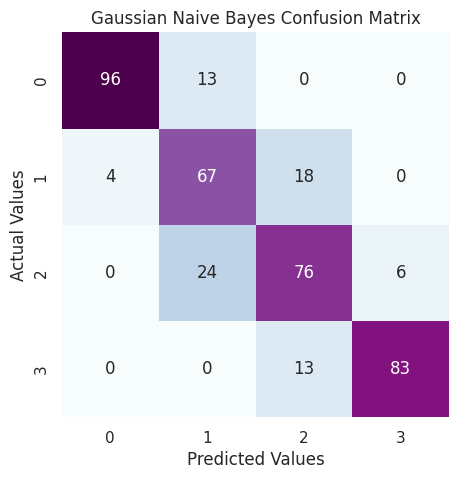

In [ ]:
nb = GaussianNB(var_smoothing= 2.848035868435799e-07)
nb.fit(X_train, y_train)
nb_pred_wo_tune_1 = nb.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, nb_pred_wo_tune_1))
print('f1 Score:', f1_score(y_test, nb_pred_wo_tune_1, average='weighted'))
cm_nb_ht=my_confusion_matrix(y_test, nb_pred_wo_tune_1, 'Gaussian Naive Bayes Confusion Matrix')

# K-Nearest Neighbours

In [ ]:
error_rate = []

for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

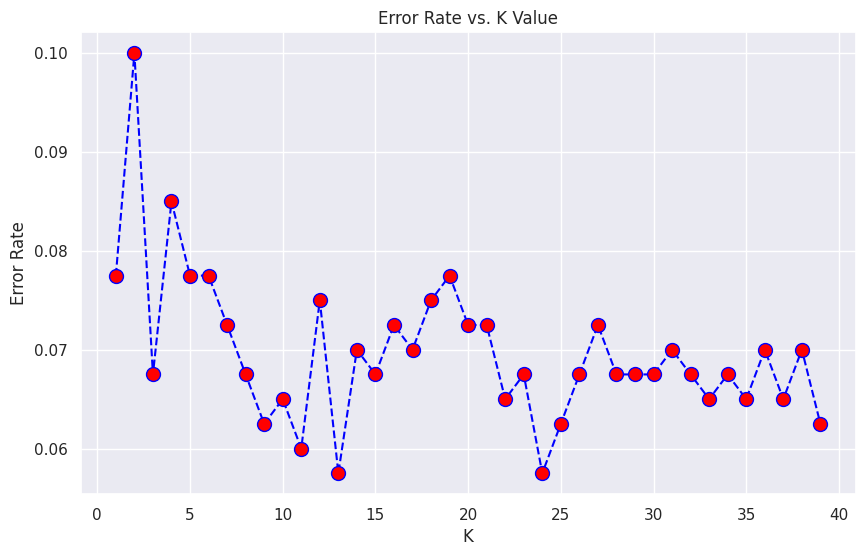

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# grid_params = { 'n_neighbors' : [13,14,15,16,17,24],
#                 'weights' : ['uniform','distance'],
#                 'metric' : ['minkowski','euclidean','manhattan'],
#                 'leaf_size': [5, 7, 9]
#               }

In [ ]:
# gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
# g_res = gs.fit(X_train, y_train)
# g_res.best_params_

In [ ]:
knn = KNeighborsClassifier(n_neighbors=24,leaf_size=5, weights='distance', metric='minkowski')

In [ ]:
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)

KNN Classifier Accuracy Score:  0.945
KNN Classifier f1 Score: 0.9449371400821219
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       109
           1       0.91      0.99      0.95        89
           2       0.94      0.90      0.92       106
           3       0.94      0.94      0.94        96

    accuracy                           0.94       400
   macro avg       0.94      0.95      0.94       400
weighted avg       0.95      0.94      0.94       400



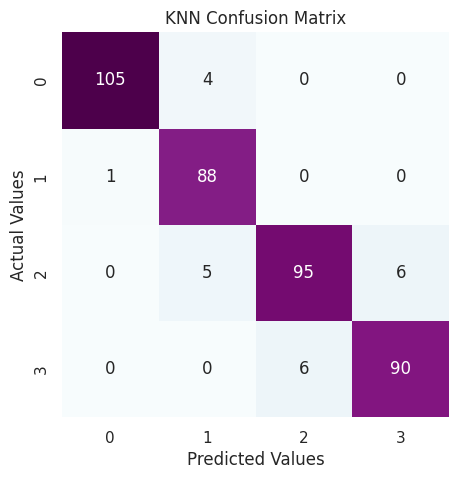

In [ ]:
print('KNN Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_knn))
print('KNN Classifier f1 Score:', f1_score(y_test, y_pred_knn, average='weighted'))
cm_knn=my_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')

# Support Vector Machine

In [ ]:
grid_params = {'kernel': ['linear'],
               'C':np.logspace(-8, 2, 11)}
gs = GridSearchCV(SVC(), grid_params, scoring='f1_macro')
g_res = gs.fit(X_train, y_train)
g_res.best_params_

{'C': 0.0001, 'kernel': 'linear'}

In [ ]:
grid_params = {'kernel': ['poly'],
                'degree': [2,3,4,5,6],
                'C': np.logspace(-1, 5, 7)}
gs = GridSearchCV(SVC(), grid_params, scoring='f1_macro')
g_res = gs.fit(X_train, y_train)
g_res.best_params_

{'C': 1000.0, 'degree': 2, 'kernel': 'poly'}

In [ ]:
grid_params = {'kernel': ['rbf'],
               'gamma': np.logspace(-8, 1, 10),
               'C':np.logspace(-1, 5, 7)}
gs = GridSearchCV(SVC(), grid_params, scoring='f1_macro')
g_res = gs.fit(X_train, y_train)
g_res.best_params_


{'C': 10000.0, 'gamma': 1e-08, 'kernel': 'rbf'}

In [ ]:
rbf = SVC(kernel='rbf',C=10000,gamma=1e-08).fit(X_train, y_train)
poly = SVC(kernel='poly', degree=2, C=1000).fit(X_train, y_train)
linear= SVC(kernel='linear', C=0.0001).fit(X_train, y_train)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
linear_pred = linear.predict(X_test)

SVM (Polynomial) Classifier Accuracy Score:  0.98
SVM (Polynomial) Classifier f1 Score: 0.9800284444924577
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       109
           1       0.96      0.99      0.97        89
           2       0.98      0.96      0.97       106
           3       0.98      0.99      0.98        96

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



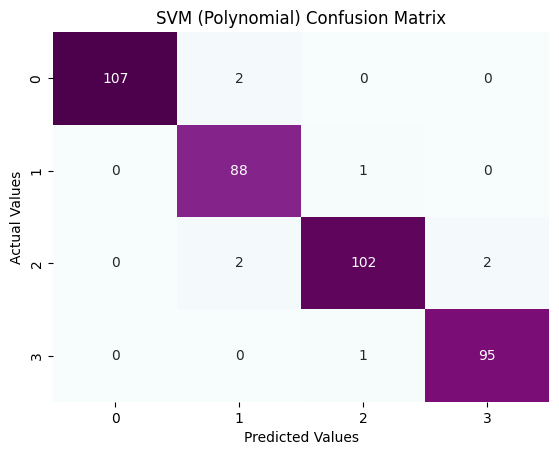

In [ ]:
print('SVM (Polynomial) Classifier Accuracy Score: ',accuracy_score(y_test,poly_pred))
print('SVM (Polynomial) Classifier f1 Score:', f1_score(y_test, poly_pred, average='weighted'))
cm_svm=my_confusion_matrix(y_test, poly_pred, 'SVM (Polynomial) Confusion Matrix')

SVM (rbf) Classifier Accuracy Score:  0.9875
SVM (rbf) Classifier f1 Score: 0.9875151893520068
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       109
           1       0.98      0.99      0.98        89
           2       0.98      0.98      0.98       106
           3       0.99      0.99      0.99        96

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



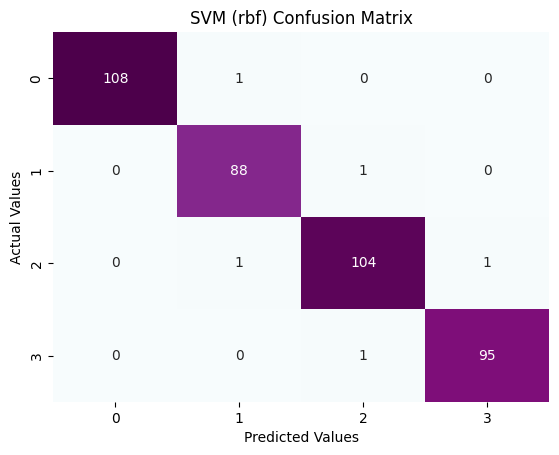

In [ ]:
print('SVM (rbf) Classifier Accuracy Score: ',accuracy_score(y_test,rbf_pred))
print('SVM (rbf) Classifier f1 Score:', f1_score(y_test, rbf_pred, average='weighted'))
cm_svm=my_confusion_matrix(y_test, rbf_pred, 'SVM (rbf) Confusion Matrix')

SVM (Linear) Classifier Accuracy Score:  0.99
SVM (Linear) Classifier f1 Score: 0.9900183198810535
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      0.98      0.99        89
           2       0.97      0.99      0.98       106
           3       0.99      0.99      0.99        96

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



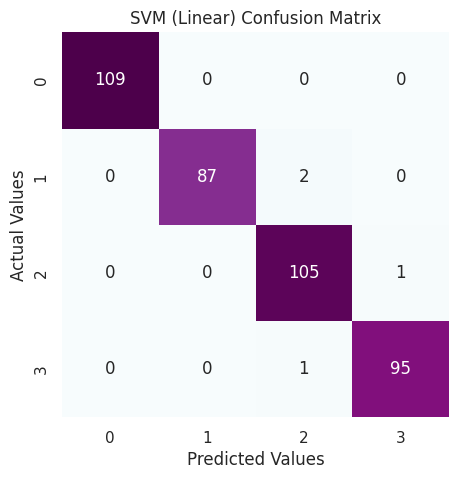

In [ ]:
print('SVM (Linear) Classifier Accuracy Score: ',accuracy_score(y_test,linear_pred))
print('SVM (Linear) Classifier f1 Score:', f1_score(y_test, linear_pred, average='weighted'))
cm_svm=my_confusion_matrix(y_test, linear_pred, 'SVM (Linear) Confusion Matrix')

# Logistic Regression (without hyparameter tuning)

Logistic Regression Classifier Accuracy Score:  0.6475
Logistic Regression Classifier f1 Score: 0.6495434063741095
              precision    recall  f1-score   support

           0       0.93      0.72      0.81       109
           1       0.52      0.64      0.57        89
           2       0.55      0.45      0.49       106
           3       0.64      0.78      0.70        96

    accuracy                           0.65       400
   macro avg       0.66      0.65      0.65       400
weighted avg       0.67      0.65      0.65       400



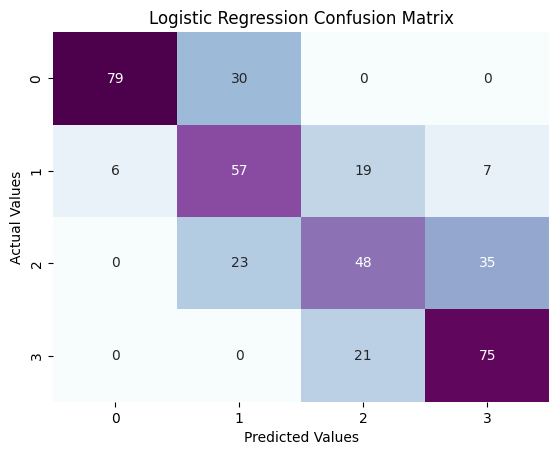

In [ ]:
lr=LogisticRegression()                                                                                                                                                                                                                                             
lr.fit(X_train,y_train)
pred2 = lr.predict(X_test)
print('Logistic Regression Classifier Accuracy Score: ',accuracy_score(y_test,pred2))
print('Logistic Regression Classifier f1 Score:', f1_score(y_test, pred2, average='weighted'))
cm_lr=my_confusion_matrix(y_test, pred2, 'Logistic Regression Confusion Matrix')

# Logistic Regression (with hyparameter tuning)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/optimize.py:210

Best hyperparameters:
 {'C': 1, 'penalty': 'l2'}
Logistic Regression Classifier Accuracy Score:  0.9925
Logistic Regression Classifier f1 Score: 0.9924837753555857
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       109
           1       1.00      0.98      0.99        89
           2       0.99      0.99      0.99       106
           3       0.99      1.00      0.99        96

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



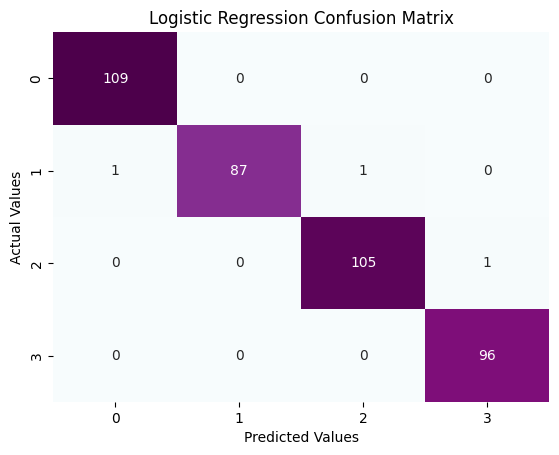

In [ ]:
param_grid = {'penalty':[None,'l2'],
              'C': [0.1,1,2, 5, 8, 10, 100]
              } 


grid = GridSearchCV(LogisticRegression(max_iter = 1000, solver='newton-cg'), param_grid, verbose = False, cv = 5) 

# fitting the model for grid search 
grid.fit(X_train, y_train) 
# print best parameter after tuning 
print('Best hyperparameters:\n', grid.best_params_) 

grid_predictions = grid.predict(X_test) 
  
print('Logistic Regression Classifier Accuracy Score: ',accuracy_score(y_test,grid_predictions))
print('Logistic Regression Classifier f1 Score:', f1_score(y_test, grid_predictions, average='weighted'))
cm_lr=my_confusion_matrix(y_test, grid_predictions, 'Logistic Regression Confusion Matrix')

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

Best hyperparameters:
 {'C': 0.1, 'penalty': 'l2'}
Logistic Regression Classifier Accuracy Score:  0.675
Logistic Regression Classifier f1 Score: 0.6768321932964712
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       109
           1       0.54      0.66      0.59        89
           2       0.57      0.48      0.52       106
           3       0.68      0.79      0.73        96

    accuracy                           0.68       400
   macro avg       0.68      0.68      0.67       400
weighted avg       0.69      0.68      0.68       400



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


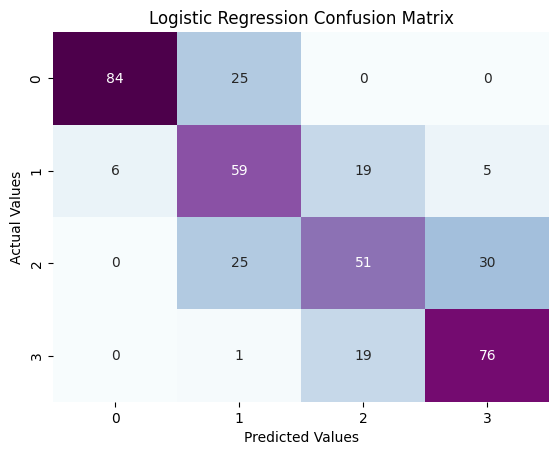

In [ ]:
param_grid = {'penalty':['elasticnet', 'l1', 'l2', None],
              'C': [0.1,1,2, 5, 8, 10, 100]
              } 


grid = GridSearchCV(LogisticRegression(max_iter = 1000, solver='saga'), param_grid, verbose = False, cv = 5) 

# fitting the model for grid search 
grid.fit(X_train, y_train) 
# print best parameter after tuning 
print('Best hyperparameters:\n', grid.best_params_) 

grid_predictions = grid.predict(X_test) 
  
print('Logistic Regression Classifier Accuracy Score: ',accuracy_score(y_test,grid_predictions))
print('Logistic Regression Classifier f1 Score:', f1_score(y_test, grid_predictions, average='weighted'))
cm_lr=my_confusion_matrix(y_test, grid_predictions, 'Logistic Regression Confusion Matrix')

Best hyperparameters:
 {'C': 5, 'penalty': 'l1'}
Logistic Regression Classifier Accuracy Score:  0.8625
Logistic Regression Classifier f1 Score: 0.8611052853933785
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       109
           1       0.67      0.81      0.73        89
           2       0.81      0.64      0.72       106
           3       0.98      1.00      0.99        96

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400



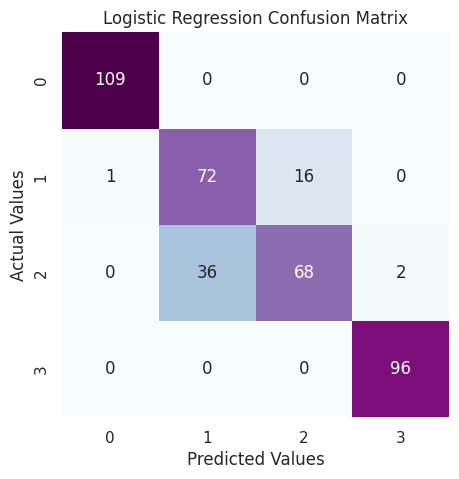

In [ ]:
param_grid = {'penalty':['l1','l2'],
              'C': [0.1,1,2, 5, 8, 10, 100]
              } 


grid = GridSearchCV(LogisticRegression(max_iter = 1000, solver='liblinear'), param_grid, verbose = False, cv = 5) 

# fitting the model for grid search 
grid.fit(X_train, y_train) 
# print best parameter after tuning 
print('Best hyperparameters:\n', grid.best_params_) 

grid_predictions = grid.predict(X_test) 
  
print('Logistic Regression Classifier Accuracy Score: ',accuracy_score(y_test,grid_predictions))
print('Logistic Regression Classifier f1 Score:', f1_score(y_test, grid_predictions, average='weighted'))
cm_lr=my_confusion_matrix(y_test, grid_predictions, 'Logistic Regression Confusion Matrix')

In [80]:
# Create adaboost classifer object
dt=DecisionTreeClassifier(max_depth=10)

abc = AdaBoostClassifier(n_estimators=150,learning_rate=1, base_estimator=dt)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.9075


Accuracy: 0.9825
f1 Score: 0.9825374844358759
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       109
           1       0.96      0.98      0.97        89
           2       0.98      0.98      0.98       106
           3       0.99      1.00      0.99        96

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



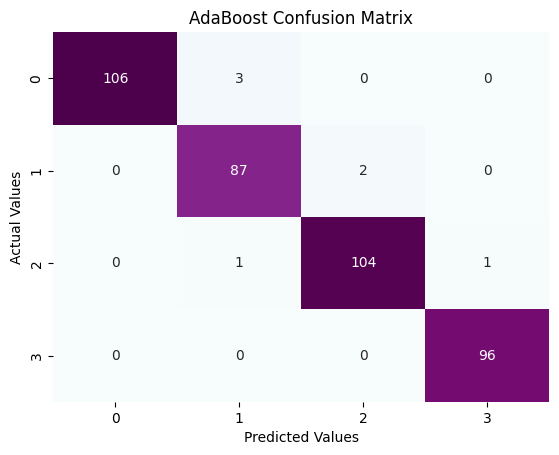

In [83]:
# Create an SVC object
svc = SVC(probability=True, kernel='linear', C=0.0001) #one of our best model

# Create an Adaboost classifier object
abc = AdaBoostClassifier(n_estimators=50, estimator=svc, learning_rate=0.3)

# Train the Adaboost classifier
model = abc.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
print("Accuracy:",accuracy_score(y_test, y_pred))
print('f1 Score:', f1_score(y_test, y_pred, average='weighted'))
cm_lr=my_confusion_matrix(y_test, y_pred, 'AdaBoost Confusion Matrix')


# ANN

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Create a sequential ANN model with two hidden layers and a dropout layer for regularization
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data for 50 epochs
history = model.fit(X_train_std, y_train, epochs=50, batch_size=32, validation_data=(X_test_std, y_test))

# Evaluate the accuracy on the test data
_, accuracy = model.evaluate(X_test_std, y_test)
print("ANN Accuracy:", accuracy)

Epoch 1/50
50/50 [==============================] - 7s 8ms/step - loss: -0.6060 - accuracy: 0.2681 - val_loss: -1.5525 - val_accuracy: 0.2225
Epoch 2/50
50/50 [==============================] - 0s 6ms/step - loss: -3.0726 - accuracy: 0.2562 - val_loss: -4.6747 - val_accuracy: 0.2225
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: -7.4427 - accuracy: 0.2569 - val_loss: -10.8787 - val_accuracy: 0.2225
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: -16.3406 - accuracy: 0.2569 - val_loss: -22.6241 - val_accuracy: 0.2225
Epoch 5/50
50/50 [==============================] - 0s 7ms/step - loss: -31.8002 - accuracy: 0.2569 - val_loss: -42.7308 - val_accuracy: 0.2225
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - loss: -58.0802 - accuracy: 0.2581 - val_loss: -74.2455 - val_accuracy: 0.2225
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: -96.4208 - accuracy: 0.2650 - val_loss: -120.0755 - val_accuracy: 0.2

In [ ]:
def AdaBoost(x_t,x_v,y_t, y_v):
    t_start = time.time() # in seconds
    x_train = x_t
    x_valid = x_v
    y_train = y_t
    y_valid = y_v

    print('\n\t ---------- Training AdaBoost Classifier ---------- \n')
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
    be1 = SVC(kernel='poly',C=100,probability=True)              
    be2 = LogisticRegression(solver='newton-cg',C=0.001)        
    pipeline11 = Pipeline([('clf11', AdaBoostClassifier(algorithm='SAMME.R'))])
    clf11_parameters = {
        'clf11__base_estimator':[be1,be2,],
        'clf11__n_estimators':[10, 50, 100, 300,], 
        'clf11__learning_rate':[0.0001, 0.001, 0.01, 0.1,],
        'clf11__random_state':[40,]
        }  
    grid_search11 = GridSearchCV(estimator=pipeline11, param_grid=clf11_parameters, n_jobs=-1, cv=cv, scoring='f1_macro')
    grid_search11.fit(x_train,y_train)
    print(f"Best score on Training set :  {grid_search11.best_score_}")
    clf11 = grid_search11.best_estimator_
    print('\n\n The best set of parameters of the pipeline in Training Phase are: ')
    print(clf11) 
    predicted_class_labels11 = clf11.predict(x_valid)  # validation

    print('\n ***  Scores on Validation Data  *** \n ')
    print(classification_report(y_valid, predicted_class_labels11))
    t_ends = time.time() # in seconds
    
    t_net = (t_ends - t_start)/60    # in minutes
    net_time = round(t_net,2)
    print("====================================================================")
    print(f"Process Completed and time taken is : {net_time} minutes")
    print("====================================================================")
    
    return clf11